In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.rcParams['figure.figsize']=14,6

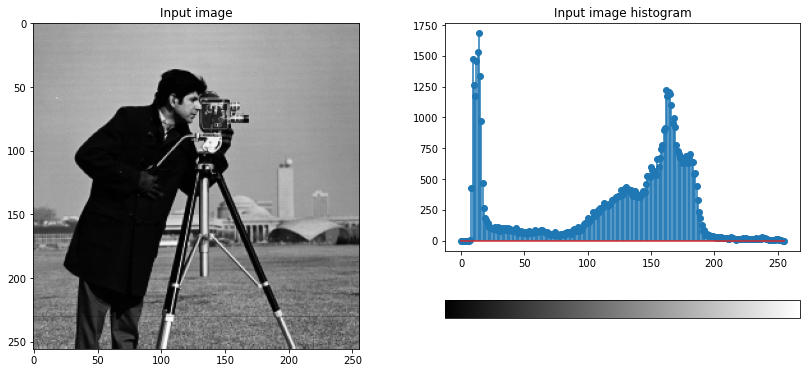

In [2]:
def hist(img, L=256):
    ans = [0]*L
    for pixel in img.flatten():
        ans[pixel]+=1
    return ans

input_img = cv2.imread('input_img.tif', cv2.IMREAD_GRAYSCALE)

input_hist=hist(input_img)
plt.subplot(1,2,1)
plt.imshow(input_img, cmap='gray')
plt.title('Input image')

plt.subplot(1,2,2)
plt.stem(input_hist, use_line_collection=True)
plt.title('Input image histogram')
plt.colorbar(orientation="horizontal",ticks=[])

plt.show()

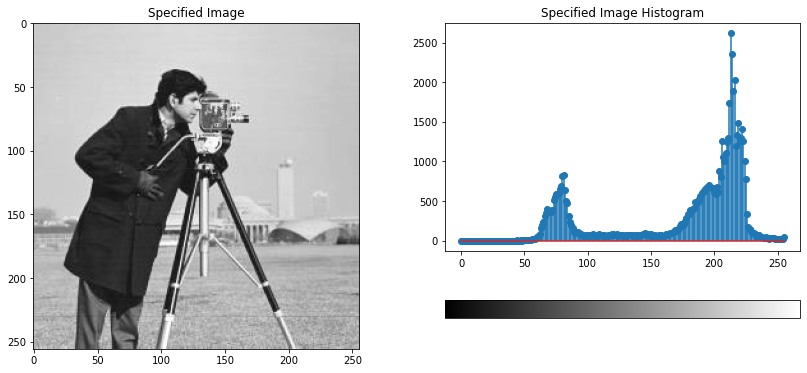

In [3]:
specified_img = cv2.imread('specified_img.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(specified_img, cmap='gray')
plt.title('Specified Image')

plt.subplot(1,2,2)
specified_hist=hist(specified_img)
plt.stem(specified_hist, use_line_collection=True)
plt.title('Specified Image Histogram')
plt.colorbar(orientation="horizontal",ticks=[])

Text(0, 0.5, 'G(z)')

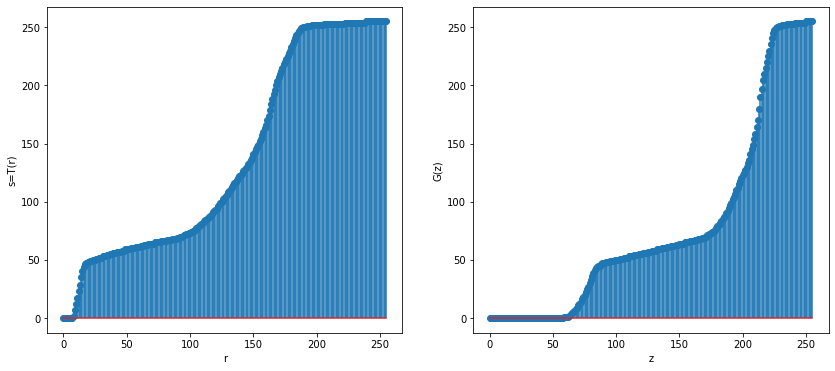

In [4]:
def compute_transfer(img_hist, img, L=256):
    cumsum=[0] * L
    cumsum[0] = img_hist[0]
    
    for idx in range(1,len(cumsum)):
        cumsum[idx]=cumsum[idx-1] + img_hist[idx]
    
    num_pixels= len(img.flatten())
    cumsum=[round( ((L-1)/num_pixels) * val) for val in cumsum]
    
    return cumsum
specified_transfer = compute_transfer(specified_hist, specified_img)
input_transfer = compute_transfer(input_hist, input_img)

plt.subplot(1,2,1)
plt.stem(input_transfer,use_line_collection=True)
plt.xlabel('r')
plt.ylabel('s=T(r)')
plt.subplot(1,2,2)
plt.stem(specified_transfer, use_line_collection=True)
plt.xlabel('z')
plt.ylabel('G(z)')

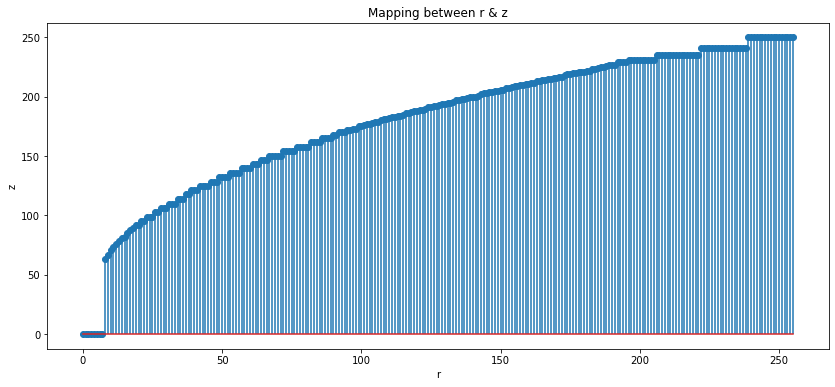

In [5]:
def compute_mapping(input_transfer, specified_transfer):
    specified_table={}
    
    for z in range(len(specified_transfer)):
        #When more than one value of G(z) satisfies s, choose the smallest value of z by convention.
        g_z = specified_transfer[z]
        
        if(not(g_z in specified_table)):
            specified_table[g_z] = z
    
    mapping = [0] * len(input_transfer)
    for r in range(len(input_transfer)):
        
        diff= 1000
        t_r = input_transfer[r] #t_r=s
        for g_z in specified_table:
            
            if abs(t_r-g_z) < diff:
                diff= abs(t_r-g_z)
                z = specified_table[g_z]
                mapping[r] = z
    
    return mapping

mapping=compute_mapping(input_transfer, specified_transfer)
plt.stem(mapping, use_line_collection=True)
plt.xlabel('r')
plt.ylabel('z')
plt.title('Mapping between r & z')
plt.show()



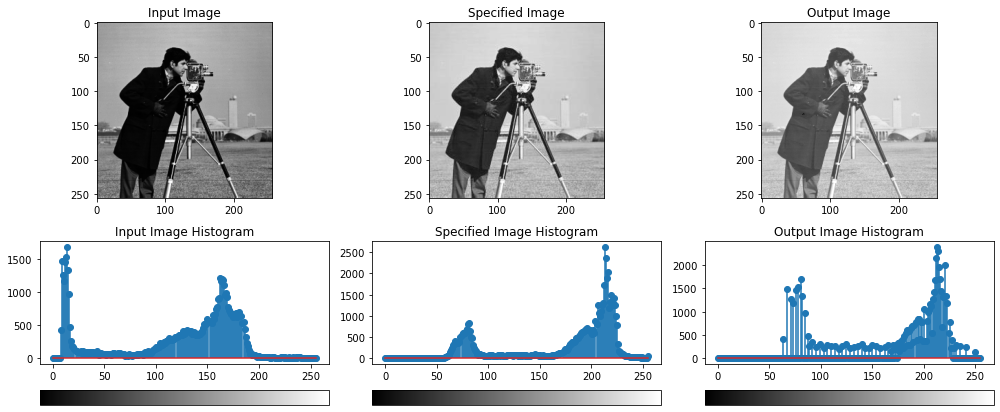

In [6]:
def compute_output_image(input_img, mapping):    
    flattened_img = input_img.flatten()
    
    output=np.zeros(len(flattened_img))
    
    for idx in range(len(flattened_img)):
        pixel=flattened_img[idx]
        output[idx] = mapping[pixel]
    return output

output=compute_output_image(input_img,mapping)
output=output.reshape(input_img.shape[0], input_img.shape[1])
output=output.astype('uint8')
output_hist=hist(output)

plt.subplot(2,3,1)
plt.imshow(input_img, cmap='gray')
plt.title('Input Image')
plt.subplot(2,3,2)
plt.imshow(specified_img, cmap='gray')
plt.title('Specified Image')
plt.subplot(2,3,3)
plt.imshow(output, cmap='gray')
plt.title('Output Image')
plt.subplot(2,3,4)
plt.stem(input_hist, use_line_collection=True)
plt.title('Input Image Histogram')
plt.colorbar(orientation="horizontal",ticks=[])
plt.subplot(2,3,5)
plt.stem(specified_hist, use_line_collection=True)
plt.title('Specified Image Histogram')
plt.colorbar(orientation="horizontal",ticks=[])
plt.subplot(2,3,6)
plt.stem(output_hist, use_line_collection=True)
plt.title('Output Image Histogram')
plt.colorbar(orientation="horizontal",ticks=[])

plt.tight_layout()

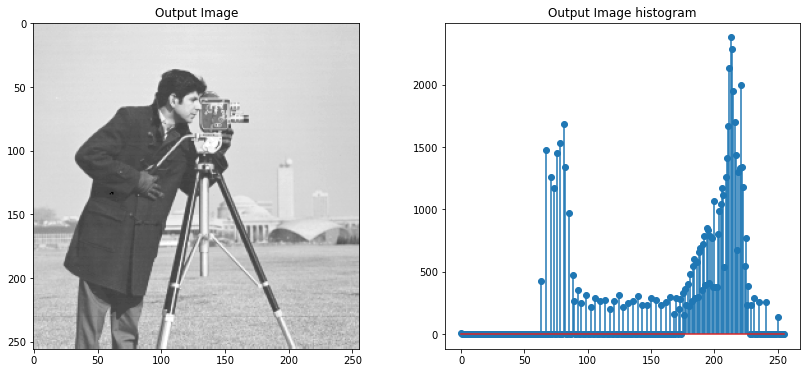

In [7]:
plt.subplot(1,2,1)
plt.imshow(output, cmap='gray')
plt.title('Output Image')
plt.subplot(1,2,2)
plt.stem(output_hist,use_line_collection=True)
plt.title('Output Image histogram')
plt.show()